## Chapter 11 -- Matrix inverse

Modified by kmp 2022

Sources:

https://web.stanford.edu/~boyd/vmls/

https://github.com/vbartle/VMLS-Companions

Based on "Boyd and Vandenberghe, 2021, Introduction to Applied Linear Algebra: Vectors, Matrices, and Least Squares - Julia Language Companion" https://web.stanford.edu/~boyd/vmls/vmls-julia-companion.pdf


In [1]:
using LinearAlgebra
using VMLS

### 11.1 Left and right inverses

We will see later how to find a left or right inverse, when one exists.

In [2]:
A = [-3 -4; 4 6; 1 1]
B = [-11 -10 16; 7 8 -11]/9     # left inverse of A
C = [0 -1 6; 0 1 -4]/2          # another left inverse of A;
A

3×2 Matrix{Int64}:
 -3  -4
  4   6
  1   1

In [3]:
B

2×3 Matrix{Float64}:
 -1.22222   -1.11111    1.77778
  0.777778   0.888889  -1.22222

In [4]:
C

2×3 Matrix{Float64}:
 0.0  -0.5   3.0
 0.0   0.5  -2.0

In [6]:
B*A, C*A

([1.0 0.0; -4.440892098500626e-16 0.9999999999999996], [1.0 0.0; 0.0 1.0])

### 11.2 Inverse

If `A` is invertible, its inverse is given by **`inv(A)`** (or alternatively by **`A^-1`**). You will get an error if `A` is not invertible or not square.

In [7]:
A = [1 -2 3; 0 2 2; -4 -4 -4]
B = inv(A)
B*A

3×3 Matrix{Float64}:
 1.0  0.0          0.0
 0.0  1.0          2.77556e-17
 0.0  5.55112e-17  1.0

In [8]:
A*B

3×3 Matrix{Float64}:
  1.0           1.11022e-16  0.0
  5.55112e-17   1.0          1.38778e-17
 -1.11022e-16  -2.22045e-16  1.0

**Dual basis.** The next example illustrates the **`dual basis`** provided by the rows of the inverse $B = A^{−1}$. We calculate the expansion $x = (b^T_1 x)a_1 + · · ·+ (b^T_nx)a_n$ for a $3×3$ example (see page [205](https://web.stanford.edu/~boyd/vmls/vmls.pdf#section*.249) of VMLS).

In [9]:
A = [1 0 1; 4 -3 -4; 1 -1 -2]

3×3 Matrix{Int64}:
 1   0   1
 4  -3  -4
 1  -1  -2

In [10]:
B = inv(A)

3×3 Matrix{Float64}:
  2.0  -1.0   3.0
  4.0  -3.0   8.0
 -1.0   1.0  -3.0

In [11]:
x = [0.2, -0.3, 1.2]

3-element Vector{Float64}:
  0.2
 -0.3
  1.2

In [12]:
rhs = (B[1,:]'*x) * A[:,1] + (B[2,:]'*x) * A[:,2] + (B[3,:]'*x) * A[:,3]

3-element Vector{Float64}:
  0.20000000000000018
 -0.3000000000000007
  1.1999999999999984

**Inverse via QR factorization.** The inverse of a matrix $A$ can be computed from
its $QR$ factorization $A = QR$ via the formula $A^{−1} = R^{−1}Q^T$.

In [13]:
A = randn(3,3)
inv(A)

3×3 Matrix{Float64}:
 -1.19381   1.24713   -0.542915
  0.842956  1.49964   -0.228319
 -1.04219   0.563949   0.0320488

In [14]:
Q, R = qr(A)
Q = Matrix(Q)
inv(R)*Q'

3×3 Matrix{Float64}:
 -1.19381   1.24713   -0.542915
  0.842956  1.49964   -0.228319
 -1.04219   0.563949   0.0320488

In [16]:
diff = inv(A) .- inv(R)*Q'
[abs(x) for x in diff]      # array comprehension

3×3 Matrix{Float64}:
 1.33227e-15  8.88178e-16  4.44089e-16
 4.44089e-16  4.44089e-16  2.498e-16
 6.66134e-16  4.44089e-16  2.498e-16

### 11.3 Solving linear equations
**Back substitution.** Let us first implement back substitution (VMLS Algorithm [11.1](https://web.stanford.edu/~boyd/vmls/vmls.pdf#algorithmctr.11.1)) in Julia and check it. You will not need this function, because Julia has a better implementation of it built in via the **`backslash operator`** discussed below. But we give it here to demonstrate that it works:

In [17]:
function back_subst(R,b)
    n = length(b)
    x = zeros(n)
    for i = n:-1:1
        x[i] = (b[i] - R[i,i+1:n]'*x[i+1:n]) / R[i,i]
    end
    return x
end

back_subst (generic function with 1 method)

In [18]:
R = triu(randn(4,4))    # random 4x4 upper triangular matrix

4×4 Matrix{Float64}:
 0.62204   1.95664  -0.458488   0.0791376
 0.0      -2.27323  -0.836473  -0.211147
 0.0       0.0       1.35155   -0.235142
 0.0       0.0       0.0       -0.394621

In [19]:
b = rand(4)
x = back_subst(R,b)
norm(R*x-b)

1.6653345369377348e-16

The function **`triu`** gives the upper triangular part of a matrix, i.e., it zeros out the entries below the diagonal. 

**Backslash notation.** The Julia command for solving a set of linear equations $$Ax = b$$ is `x=A\b`. This is faster than `x = inv(A)*b`, which first computes the inverse of $A$ and then multiplies it with $b$.

In [21]:
n = 5000
A = randn(n,n)  # random set of equations
b = randn(n) 
@time x1 = A\b;
norm(b-A*x1)

  0.698973 seconds (6 allocations: 190.811 MiB, 8.46% gc time)


1.7212171984493084e-8

In [22]:
@time x2 = inv(A)*b;
norm(b-A*x2)

  2.408225 seconds (8 allocations: 193.253 MiB)


2.105871286086316e-8

**Julia chooses a suitable algorithm for solving the equation after checking the properties of $A$.** For example, it will use back substitution if $A$ is lower triangular. This explains the result in the following timing experiment.

In [26]:
n = 5000
b = randn(n)
A = tril(randn(n,n))    # random lower triangular matrix
@time x = A\b;

A = randn(n,n)          # random square matrix
@time x = A\b;

n = 10000
b = randn(n)

A = tril(randn(n,n))
@time x = A\b

A = randn(n,n)
@time x = A\b;

  0.016989 seconds (2 allocations: 39.109 KiB)


  0.639808 seconds (6 allocations: 190.811 MiB)


  0.065965 seconds (2 allocations: 78.172 KiB)


  4.371659 seconds (6 allocations: 763.092 MiB)


When we double the size from $n = 5000$ to $n = 10000$, the solution time for the triangular equation increases by a factor of
about four, consistent with the $n^2$ complexity of backsubstitution. 

For the general square system, the solution times increases by a factor of roughly eight, as we would expect given the order $n^3$ complexity.

**Factor-solve methods for multiple right-hand sides.** A linear equation is solved by first factorizing $A$ and then solving several simpler equations with the factors of $A$. This is referred to as a **factor-solve scheme**. An important application is the solution of multiple linear equations with the same coefficient matrix and different right-hand sides.

In [28]:
n = 5000
A = randn(n,n)
B = randn(n,2)

# Solve with right-hand side B[:,1]
@time x1 = A \ B[:,1];

# Solve with right-hand side B[:,2]
@time x2 = A \ B[:,2];

# Naive approach for solving A*X = B
@time X = [ A\B[:,1] A\B[:,2] ];

# Factor-solve approach
@time X = A \ B;

  0.672138 seconds (9 allocations: 190.850 MiB)


  0.649140 seconds (9 allocations: 190.850 MiB)


  1.472051 seconds (20 allocations: 381.775 MiB, 10.49% gc time)


  0.671622 seconds (6 allocations: 190.849 MiB)


The factor-solve approach finds the solutions for the two right-hand sides in roughly
the same time as the solution for one right-hand side. The solution time with the
naïve approach is twice the time for one right-hand side.

### 11.4 Examples
**Polynomial interpolation.** We compute the interpolating polynomials in Figure [11.1](https://web.stanford.edu/~boyd/vmls/vmls.pdf#figure.11.1) of VMLS. The following code uses the functions vandermonde and linspace from the `VMLS` package. 

The function **`linspace(a,b,n)`** returns a vector with `n` equally spaced numbers in the interval [a, b]. The result is shown in Figure 11.1.

In [29]:
t = [-1.1, -0.4, 0.2, 0.8]
A = vandermonde(t, 4)

4×4 Matrix{Float64}:
 1.0  -1.1  1.21  -1.331
 1.0  -0.4  0.16  -0.064
 1.0   0.2  0.04   0.008
 1.0   0.8  0.64   0.512

In [30]:
b1 = [ -1.0, 1.3, 1.0, 0.5 ]
c1 = A \ b1

4-element Vector{Float64}:
  1.2109568793779317
 -0.8883105198894669
 -1.1096651886125566
  1.3864790180579647

In [31]:
b2 = [ 1.0, 0.0, -2.0, 0 ]
c2 = A \ b2

4-element Vector{Float64}:
 -1.5412891202364887
 -3.1090546880020584
  3.3384743911059704
  3.695135274082644

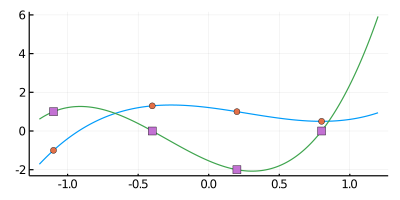

In [40]:
using Plots

ts = linspace(-1.2, 1.2, 1000)
p1 = c1[1] .+ c1[2]*ts + c1[3]*ts.^2 + c1[4]*ts.^3
plot(ts, p1, size = [400, 200], label = false)

scatter!(t, b1, label = false)
p2 = c2[1] .+ c2[2]*ts + c2[3]*ts.^2 + c2[4]*ts.^3

plot!(ts, p2,label = false)
scatter!(t, b2, marker = :square, label = false)

**Figure 11.1** Cubic interpolants through two sets of points, shown as circles
and squares.

### 11.5 Pseudo-inverse

In Julia, the **pseudo-inverse** of a matrix `A` is obtained with **`pinv(A)`**. We compute the pseudo-inverse for the example on page [216](https://web.stanford.edu/~boyd/vmls/vmls.pdf#section*.270) of VMLS using the **`pinv`** function, and via the formula $A† = R^{−1}Q^{T}$ , where $A = QR$ is the $QR$ factorization of $A$. 

In [41]:
A = [-3 -4; 4 6; 1 1]
pinv(A)

2×3 Matrix{Float64}:
 -1.22222   -1.11111    1.77778
  0.777778   0.888889  -1.22222

In [43]:
Q, R = qr(A)
Q = Matrix(Q)

3×2 Matrix{Float64}:
 -0.588348  -0.457604
  0.784465  -0.522976
  0.196116   0.719092

In [44]:
R

2×2 Matrix{Float64}:
 5.09902   7.2563
 0.0      -0.588348

In [45]:
R \ Q'      # pseudo-inverse from QR factors

2×3 Matrix{Float64}:
 -1.22222   -1.11111    1.77778
  0.777778   0.888889  -1.22222